<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://doheon.github.io/%EC%BD%94%EB%93%9C%EA%B5%AC%ED%98%84/time-series/ci-1.arima-post/#modeling-training-evaluate

# 데이터셋 로드

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
df = pd.read_csv('df.csv').drop(['Unnamed: 0'],axis=1)
df

,ds,y
0,20230221000030,1
1,20230221000100,1
2,20230221000130,1
3,20230221000200,1
4,20230221000230,1
...,...,...
45403,20230503075100,1
45404,20230503075130,1
45405,20230503075200,1
45406,20230503075230,1


# ARIMA

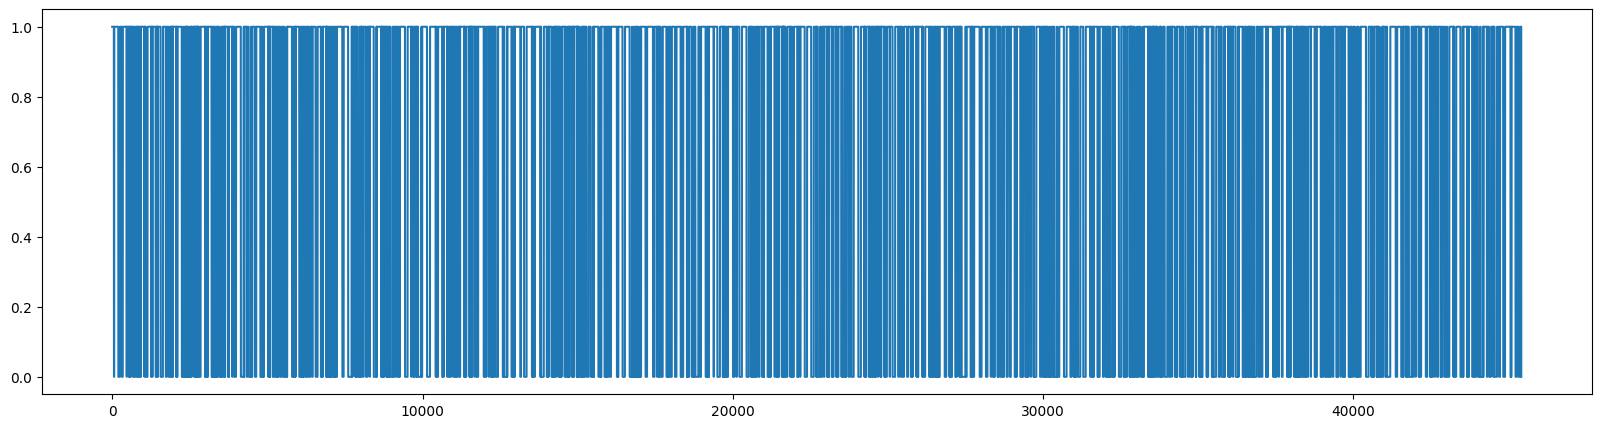

In [155]:
plt.figure(figsize=(20,5))
plt.plot(range(len(df["ds"])), df["y"])
plt.show()

In [160]:
idx = []
for i in range(1,49):
  idx.append(946*i-1)

idx

[945,
 1891,
 2837,
 3783,
 4729,
 5675,
 6621,
 7567,
 8513,
 9459,
 10405,
 11351,
 12297,
 13243,
 14189,
 15135,
 16081,
 17027,
 17973,
 18919,
 19865,
 20811,
 21757,
 22703,
 23649,
 24595,
 25541,
 26487,
 27433,
 28379,
 29325,
 30271,
 31217,
 32163,
 33109,
 34055,
 35001,
 35947,
 36893,
 37839,
 38785,
 39731,
 40677,
 41623,
 42569,
 43515,
 44461,
 45407]

In [164]:
# 훈련 데이터셋 정의
df_train = df.iloc[idx]   # 마지막 수면 단계를 예측하는 것이 목표
df_train

,ds,y
945,20230221075300,1
1891,20230222075300,1
2837,20230223075300,0
3783,20230227075300,1
4729,20230228075300,1
5675,20230302075300,1
6621,20230303075300,1
7567,20230306075300,1
8513,20230307075300,0
9459,20230308075300,0


# 패턴 쪼개기

<Figure size 640x480 with 0 Axes>

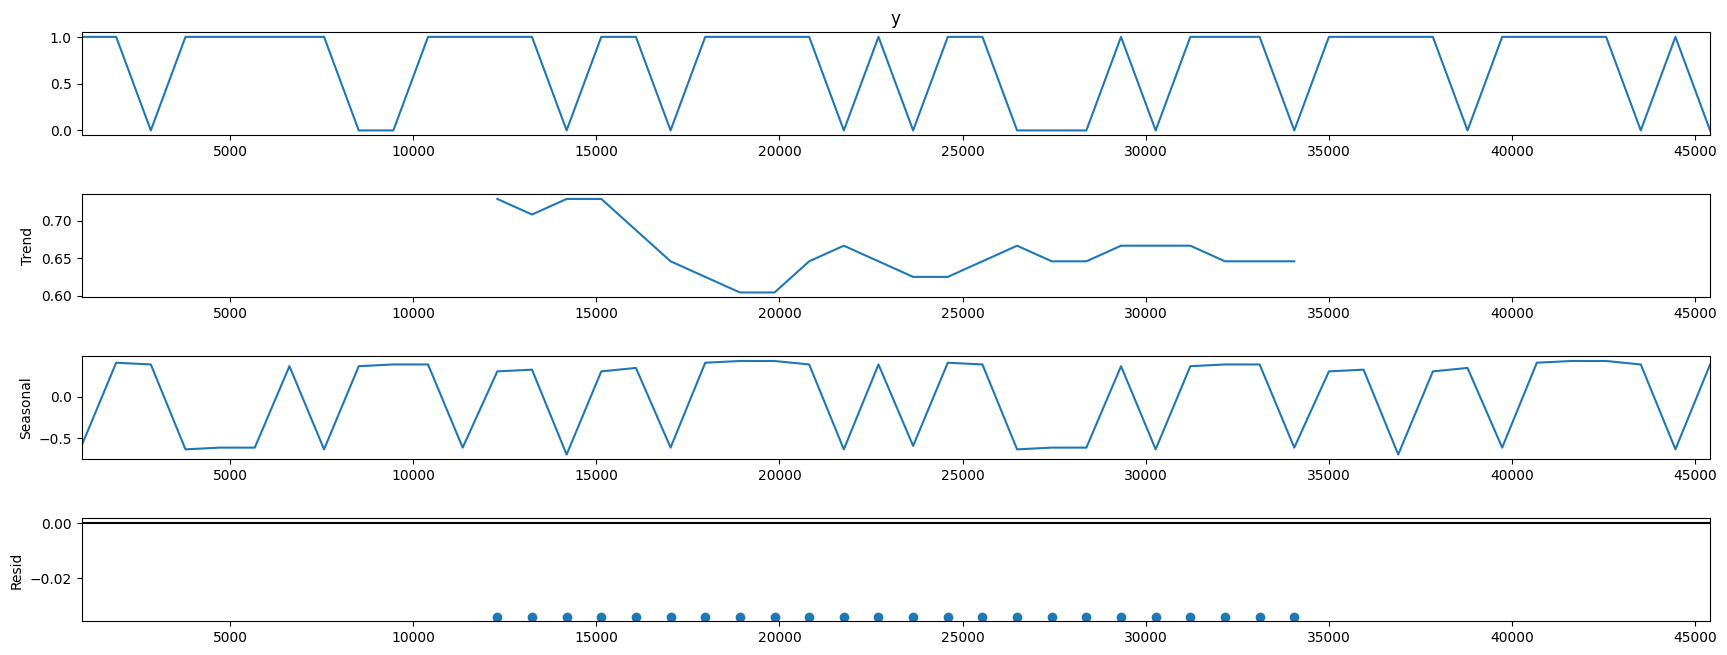

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_train['y'], model="additive", period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,7)
plt.show()

In [ ]:
# 특정 주기는 없어 보임..Trend와 Seasonal을 보는 것이 맞는지
# Resid가 모두 -0.02 이하.

# ACF, PACF

- 상관도표(Correlogram)는 autocorrelation function(ACF)와 partial autocorrelation function(PACF) 중 하나를 그래프로 표현한 것.
- Correlogram을 활용하여 현 시점의 자료와 시점의 차이(lag)를 가지는 자료를 비교하여 어떤 관계를 가지고 있는지를 분석할 수 있음. 
- 즉, Correlogram을 활용하여 시점의 차이의 영향력을 알아볼 수 있습니다.

https://direction-f.tistory.com/65

## [자기상관함수(Autocorrelation Fucntion, ACF)]

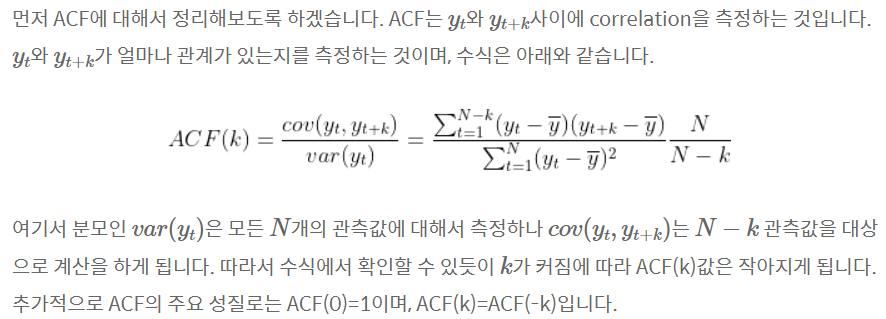

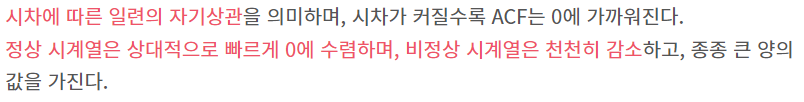


## [편자기상관함수(Partial Autocorrelation Fucntion, PACF)]

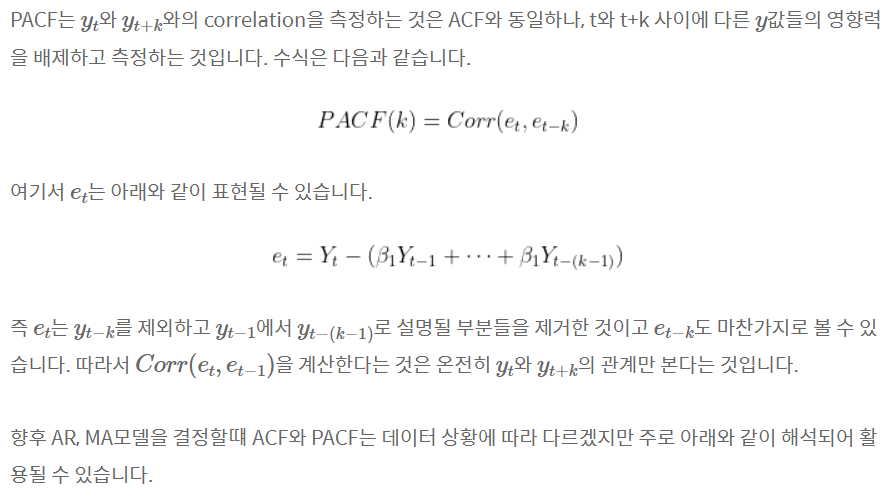

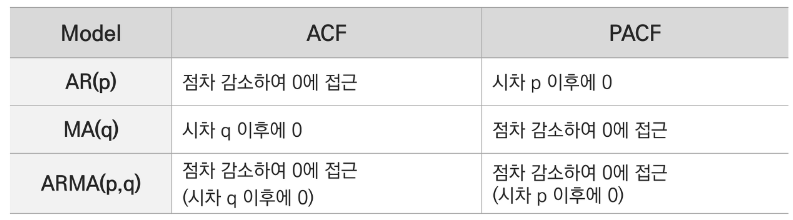

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


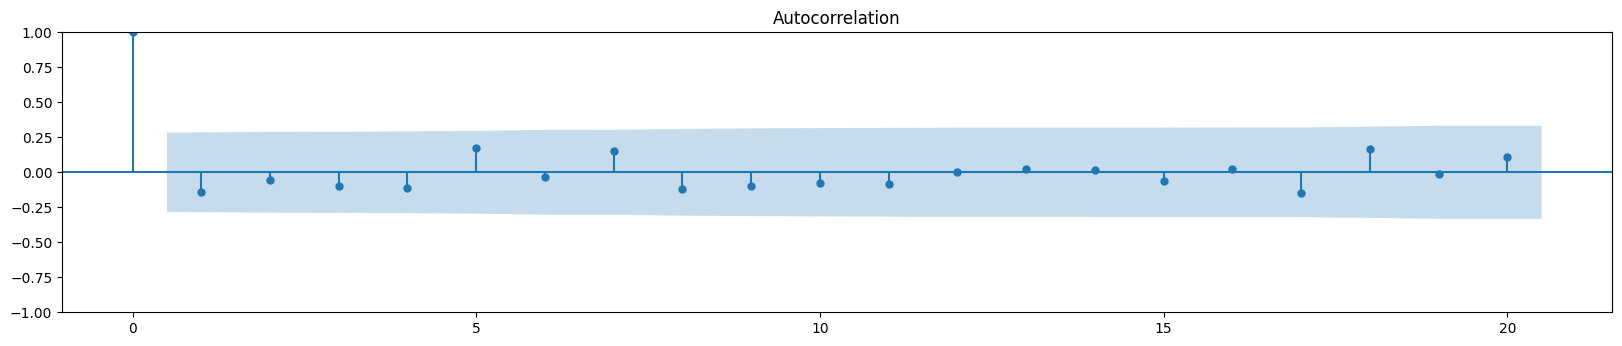

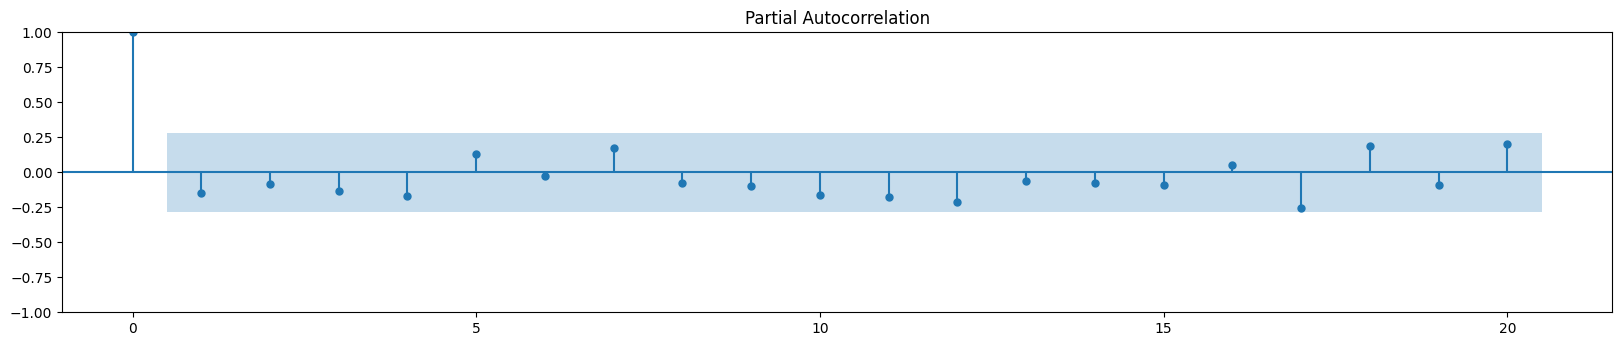

In [168]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train["y"], lags=20, ax=ax1)   # correlation 과 신뢰구간. 

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train["y"], lags=20, ax=ax1)

In [ ]:
# ACF 안정적임. 정상 시계열. q = 1
# PACF q = 1


# Modeling, Training, Evaluate

In [170]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from tqdm import tqdm

- 최적의 파라미터를 찾기 위해 위에서 구한 범위에 들어가도록 grid search를 진행.

In [171]:
p = range(0,3)
d = range(1,2)
q = range(0,3)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = ARIMA(df_train["y"], order=(i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic,2))
            params.append((i))
        except:
            continue

  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 22%|██▏       | 2/9 [00:00<00:00, 19.62it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported in

- 9개의 파라미터들에 대한 탐색 진행

In [172]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = ARIMA(df_train["y"], order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -32.981
Date:                Sun, 11 Jun 2023   AIC                             69.962
Time:                        15:35:48   BIC                             73.663
Sample:                             0   HQIC                            71.355
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9994      7.706     -0.130      0.897     -16.102      14.104
sigma2         0.2195      1.658      0.132      0.895      -3.029       3.469
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):                 8.07
Prob(Q):                              0.31   Prob(JB):                         0.02
Heteroskedasticity (H):               1.01   Skew:                            -0.74
Prob(H) (two-sided):                  0.98   Kurtosis:                         1.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- 탐색된 파라미터들 중 aic가 가장 낮은 모델을 최적의 모델로 선택하였다.
- 최적의 파라미터는 (0,1,1) 이고 모델 학습의 결과는 위와 같다.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: ignored

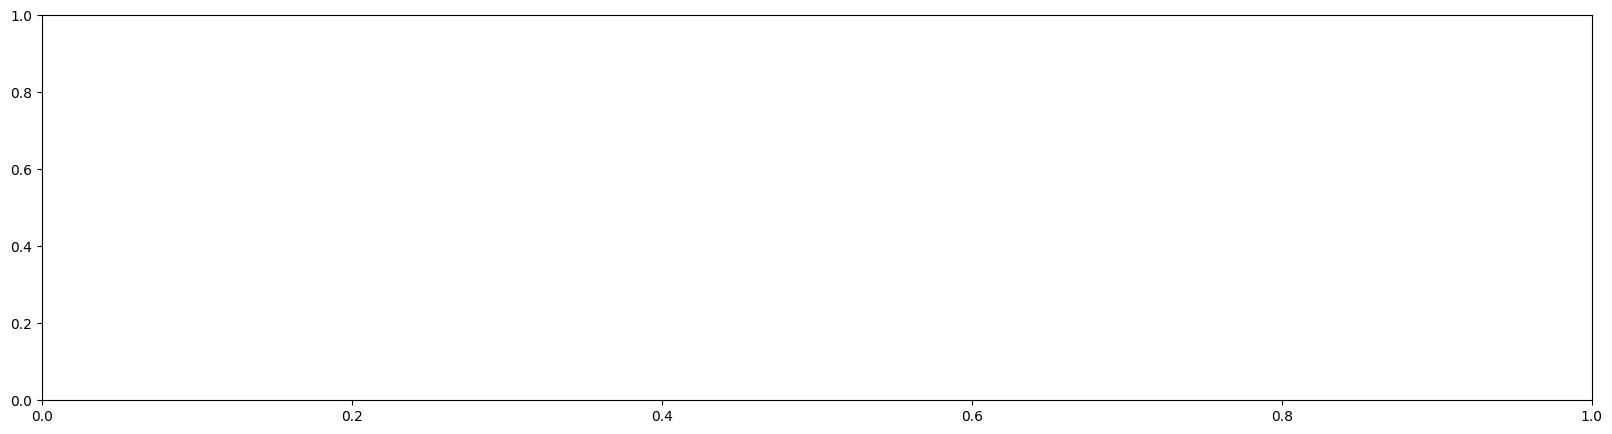

In [173]:
# model = ARIMA(df_train["y"], order=optimal[0][0])
# model_fit = model.fit()
# forecast = model_fit.forecast(steps=24*7)  # 일주일을 예측하는 것이 아니라 하루의 마지막 수면 단계를 예측하는 것으로 하려면 어떻게 해야할까..?

# plt.figure(figsize=(20,5))
# plt.plot(range(200,744), df["y"].iloc[400:])
# plt.plot(forecast)